In [248]:
import math
import numpy as np
import sys
import random
import csv
from sklearn import model_selection
from xgboost import XGBClassifier
from xgboost import plot_importance
from numpy import loadtxt
from matplotlib import pyplot
random.seed(0)

In [249]:
def test_data(id):
    f = open(id)
    reader = csv.reader(f)
    result_x = []
    result_y = []
    for row in reader:
        if row[0] == 'id':
            continue
        result_x.append([elem if elem.isdigit() else len(elem) for elem in row[:-1]])
        result_y.append(float(row[-1]))
    f.close()
    result_x = [[float(elem) for elem in row] for row in result_x]
    return np.array(result_x),np.array(result_y)

In [250]:
X,y = test_data('train.csv')

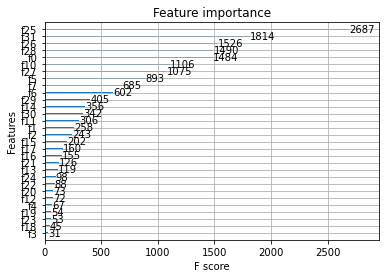

In [251]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.25,random_state=1)
clf = XGBClassifier(max_depth=6,learning_rate=0.03, n_estimators=130,subsample=0.80,colsample_bytree=0.9)
clf = clf.fit(train_X, train_y)
plot_importance(clf)
pyplot.show()

In [252]:
#most important features
# [25,31,28,0,10,27,5,7,6,29,14,30,11,1,2,15,17,16,21,13, 24,22,20,12,4,19,23,18,3]

In [253]:
def read_data(id):
    f = open(id)
    reader = csv.reader(f)
    result_x = []
    result_y = []
    for row in reader:
        if row[0] == 'id':
            continue
        n = [elem if elem.isdigit() else len(elem) for elem in row]
        result_x.append(row[:3]+ row[5:8] +row[10:18]+ row[21:22] + row[24:-1])
        result_y.append(float(row[-1]))
    f.close()
    result_x = [[float(elem) if elem.isdigit() else len(elem) for elem in row] for row in result_x]
    return np.array(result_x),np.array(result_y)

In [254]:
X,y = read_data('train.csv')

In [255]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.25,random_state=1)
model = XGBClassifier(max_depth=6,learning_rate=0.03, n_estimators=130,subsample=0.80,colsample_bytree=0.9)
model = model.fit(train_X, train_y)
predict = model.predict(test_X)
prediction = [round(value) for value in predict]
n = len(test_y)
right = 0
for i in range(0,n):
    if (prediction[i] == test_y[i]):
        right +=1
print(right/n)#0.942409331146346

0.9318388919263714


In [256]:
model = model.fit(X, y)

In [257]:
f_final = open('test.csv')
reader_final = csv.reader(f_final)
final_x = []
final_id = []
count = 0
for row in reader_final:
    count +=1 
    if row[0] == 'id':
        continue
    final_id.append(row[0])
    final_x.append(row[:3]+ row[5:8] +row[10:18]+ row[21:22] + row[24:])

f_final.close()
final_x = [[float(elem) if elem.isdigit() else len(elem) for elem in row] for row in final_x]
get_x = np.array(final_x)
get_id = np.array(final_id)

In [258]:
get_y = [str(int(round(elem))) for elem in model.predict(get_x)]
new =[]
new =[['id','label']]
for i in range(len(get_y)):
    new.append([get_id[i],get_y[i]])
new = np.array(new)
np.savetxt("final.csv",new,fmt='%s',delimiter=",")